In [1]:
import os
os.chdir("..")
print(os.getcwd())

/home/b/b382397/AQUA/diagnostics/ocean_circulation


In [101]:
%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
import ocean_circulation_func as fn
from aqua.util import load_yaml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
# Here we load the EN4 observations
reader = Reader(model='EN4',exp='en4',source='monthly')
den4=reader.retrieve()
den4=den4.rename({"depth":"lev"}) # We standardise the name for the vertical dimension
den4=den4[["ocpt","so"]].resample(time="M").mean()  # And we keep only the relevant variables in the dataset

In [96]:
# Here we load the data of a model (chosen from the catalog as an example )
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
dmod = reader.retrieve()

dmod=dmod.rename({"nz1":"lev"}) # We standardise the name for the vertical dimension
dmod=dmod[["ocpt","so"]].resample(time="M").mean() # And we keep only the relevant variables in the dataset

In [97]:
# Here we compute the regional average of temperature and salinity in the Labrador Sea region (other regions can be selected/defined) 
dmod_ls_mean=fn.weighted_area_mean(dmod, 'Labrador Sea') # In the model (monthly)
den4_ls_mean=fn.weighted_area_mean(den4, 'Labrador Sea') # In the obs (monthly)
# Other predefined regions are the 'Irminger Sea', the 'GIN Seas', the 'Southern Ocean' and the 'Weddell Sea'

2023-07-06 18:01:09,680 - INFO -  data slicing for this region, latitude 50.0 to 65.0, longitude 300.0 to 325.0
2023-07-06 18:01:09,711 - INFO -  data slicing for this region, latitude 50.0 to 65.0, longitude 300.0 to 325.0


In [21]:
# Here we compute the density values (referred to the surface level, sigma0) first for the Labrador Sea 
rho_t_s_labrador_mod= fn.convert_variables(dmod_ls_mean) # In the model (monthly)
rho_t_s_labrador_en4= fn.convert_variables(den4_ls_mean) # In the obs (monthly)

In [152]:
%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
import ocean_circulation_func as fn
from aqua.util import load_yaml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2023-07-06 19:37:49,239 - INFO -  data slicing for this region, latitude 50.0 to 65.0, longitude 300.0 to 325.0
2023-07-06 19:37:49,963 - INFO -  data slicing for this region, latitude 50.0 to 65.0, longitude 300.0 to 325.0
2023-07-06 19:38:01,704 - INFO - ./figs/vertical_TS_labrador_sea_mean.png saved


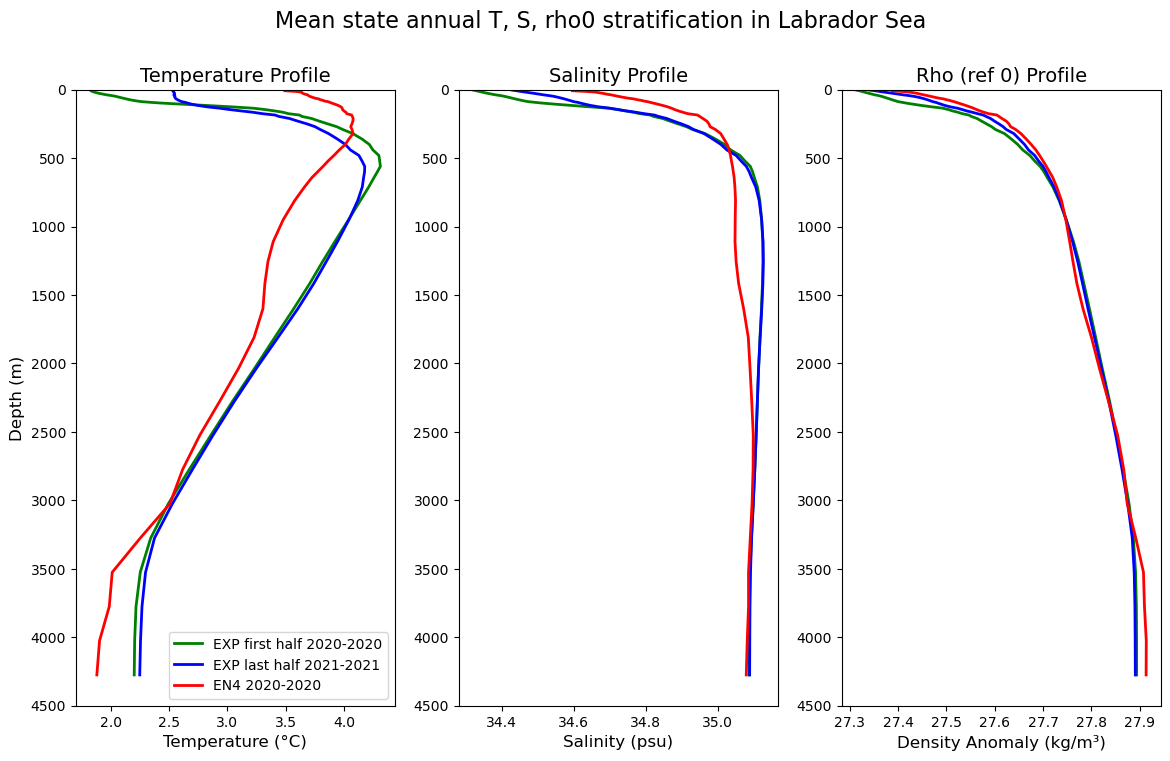

In [160]:
kt= fn.plot_stratification(dmod.isel(time=slice(0,24)), region= "Labrador Sea", month = 1, outputfig="./figs")

In [146]:
rho_t_s_labrador_mod.lev

<xarray.DataArray 'lev' (lev: 69)>
array([2.500e+00, 7.500e+00, 1.250e+01, 1.750e+01, 2.250e+01, 2.750e+01,
       3.250e+01, 3.750e+01, 4.250e+01, 4.750e+01, 5.250e+01, 5.750e+01,
       6.250e+01, 6.750e+01, 7.250e+01, 7.750e+01, 8.250e+01, 8.750e+01,
       9.250e+01, 9.750e+01, 1.050e+02, 1.150e+02, 1.250e+02, 1.350e+02,
       1.450e+02, 1.550e+02, 1.650e+02, 1.750e+02, 1.850e+02, 1.950e+02,
       2.100e+02, 2.300e+02, 2.500e+02, 2.700e+02, 2.900e+02, 3.200e+02,
       3.600e+02, 4.000e+02, 4.400e+02, 4.800e+02, 5.200e+02, 5.600e+02,
       6.000e+02, 6.400e+02, 7.100e+02, 8.100e+02, 9.500e+02, 1.110e+03,
       1.255e+03, 1.415e+03, 1.600e+03, 1.810e+03, 2.035e+03, 2.275e+03,
       2.525e+03, 2.775e+03, 3.025e+03, 3.275e+03, 3.525e+03, 3.775e+03,
       4.025e+03, 4.275e+03, 4.525e+03, 4.775e+03, 5.025e+03, 5.275e+03,
       5.525e+03, 5.825e+03, 6.175e+03])
Coordinates:
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
Attributes:
    axis:       Z
    long_name:  depth at layer midpoint
    positive:   down
    units:      m

In [147]:
kt.so.mean("time").lev

<xarray.DataArray 'lev' (lev: 42)>
array([5.021590e+00, 1.507854e+01, 2.516046e+01, 3.527829e+01, 4.544776e+01,
       5.569149e+01, 6.604198e+01, 7.654591e+01, 8.727029e+01, 9.831118e+01,
       1.098062e+02, 1.219519e+02, 1.350285e+02, 1.494337e+02, 1.657285e+02,
       1.846975e+02, 2.074254e+02, 2.353862e+02, 2.705341e+02, 3.153741e+02,
       3.729655e+02, 4.468009e+02, 5.405022e+02, 6.573229e+02, 7.995496e+02,
       9.679958e+02, 1.161806e+03, 1.378661e+03, 1.615291e+03, 1.868071e+03,
       2.133517e+03, 2.408583e+03, 2.690780e+03, 2.978166e+03, 3.269278e+03,
       3.563041e+03, 3.858676e+03, 4.155628e+03, 4.453502e+03, 4.752021e+03,
       5.050990e+03, 5.350272e+03], dtype=float32)
Coordinates:
  * lev      (lev) float32 5.022 15.08 25.16 ... 4.752e+03 5.051e+03 5.35e+03
Attributes:
    standard_name:  depth
    long_name:      ocean depth coordinate
    units:          m
    positive:       down
    axis:           Z
    bounds:         lev_bnds

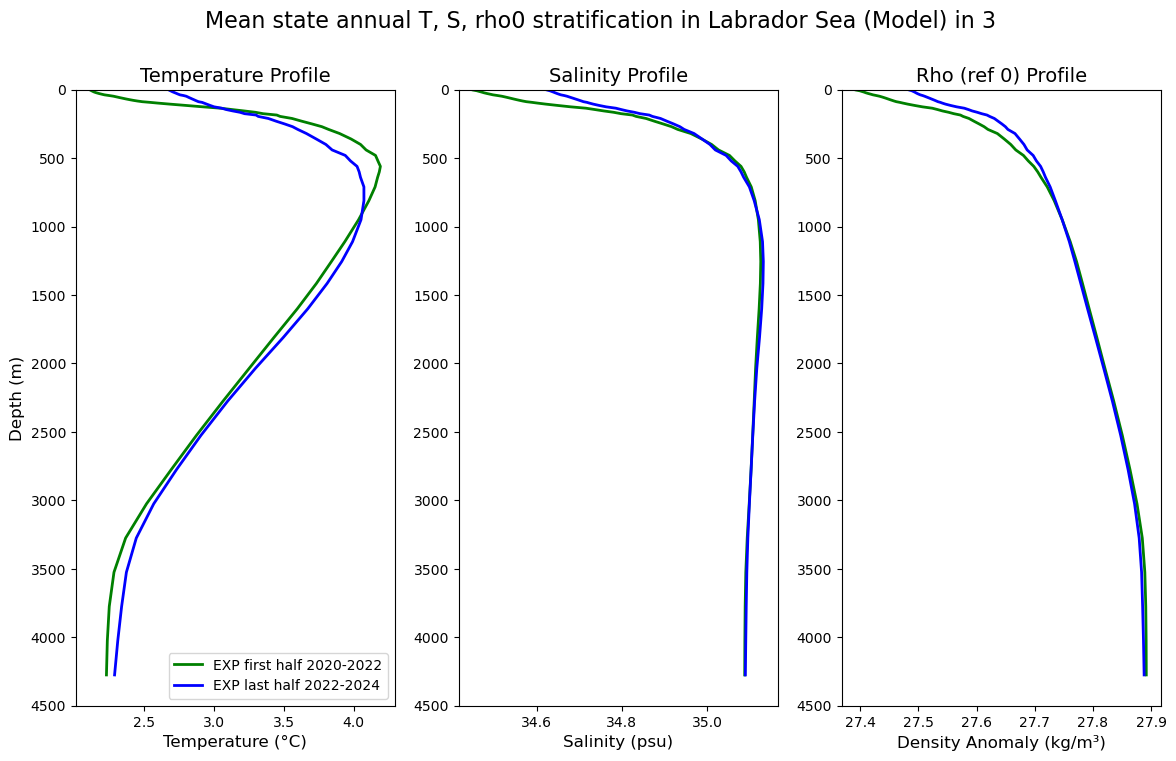

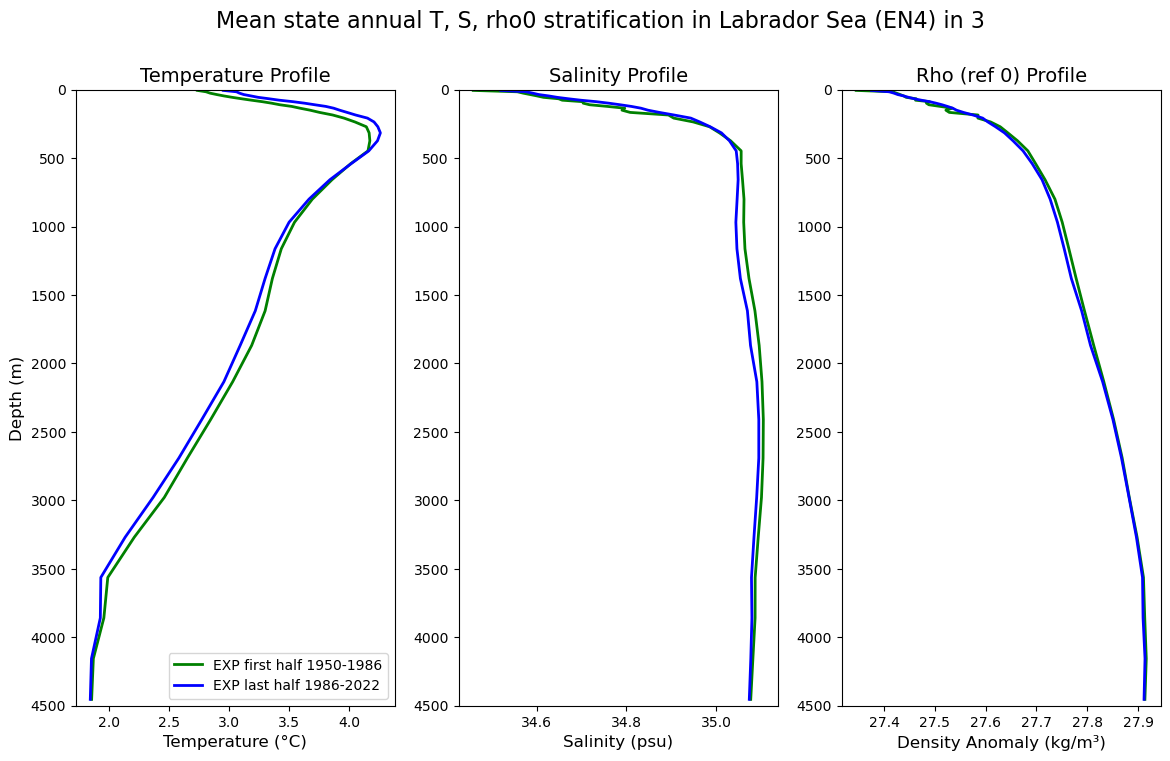

In [10]:
# Here we plot the vertical profiles in the Labrador Sea in March
fn.plot_strat_1dataset_2halves_month(rho_t_s_labrador_mod, "Labrador Sea (Model)",3) # First in the model
fn.plot_strat_1dataset_2halves_month(rho_t_s_labrador_en4, "Labrador Sea (EN4)",3) # First in the model


In [4]:
config = load_yaml("config.yaml")
outputfig= config["outputfig"]


In [4]:
labrador_sea_mean=fn.weighted_area_mean(yearly_data, use_predefined_region=True, region="Labrador Sea")
converted_labrador_sea_mean= fn.convert_variables(labrador_sea_mean)

2023-07-03 01:51:45,488 - INFO - ./figs/vertical_TS_labrador_sea_mean.png saved


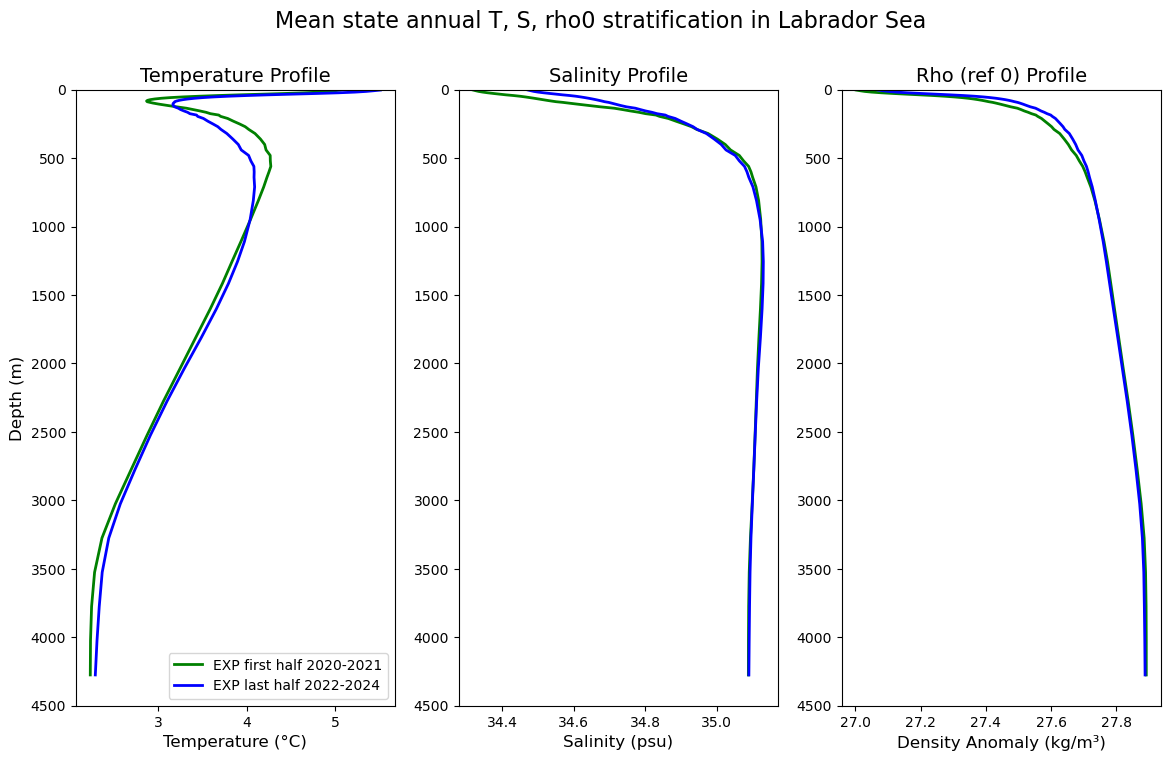

In [6]:
fn.plot_temporal_split(converted_labrador_sea_mean, "Labrador Sea")